# Filtering an Image
### Opencv Library
First, we use a package to show how gaussian filters change your original image. 

filter with original, image shape: (470, 712, 3)
filter with 3*3 kernel, image shape: (470, 712, 3)
filter with 5*5 kernel, image shape: (470, 712, 3)
filter with 7*7 kernel, image shape: (470, 712, 3)


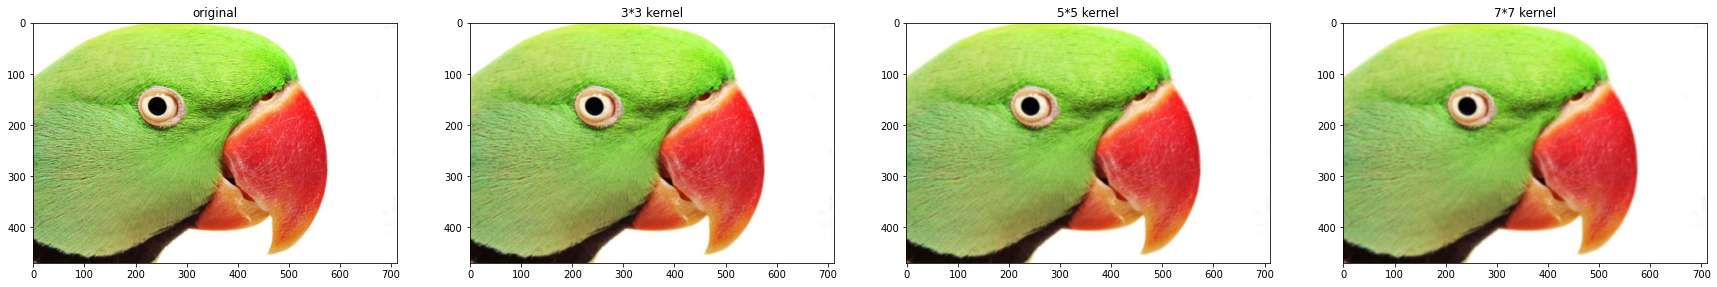

In [ ]:
image = cv2.imread("image/bird.jpg")
image = image[:,:,::-1]

image_list = []
image_list.append(image)
image_list.append(cv2.GaussianBlur(image,(3,3),0))
image_list.append(cv2.GaussianBlur(image,(5,5),0))
image_list.append(cv2.GaussianBlur(image,(7,7),0))
title_list = []
title_list.append('original')
title_list.append('3*3 kernel')
title_list.append('5*5 kernel')
title_list.append('7*7 kernel')

fig = plt.figure(figsize=(30,60))
for im,ss,i in zip(image_list,title_list,range(0, 4)):
  plt.subplot(1,4,i+1)
  plt.imshow(im)
  plt.title(ss)
  print('filter with {}, image shape: {}'.format(ss, im.shape))
plt.show()



## Step 1 : Get gaussian filter kernel

![image.png](https://i.imgur.com/oh9HkZA.png)

[OpenCV getGaussianKernel](https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html?highlight=gaussianblur#Mat%20getGaussianKernel(int%20ksize,%20double%20sigma,%20int%20ktype))

### getGaussianKernel(int ksize, double sigma, int ktype=CV_64F )

### Parameters:	
**ksize** – Aperture size. It should be odd ( $ksize\ mod\ 2 = 1$) and positive.

**sigma** – Gaussian standard deviation. If it is non-positive, it is computed from ksize as $\ \ sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8$

**ktype** – Type of filter coefficients. It can be CV_32f or CV_64F .

$G_i = \alpha * e^{(-i-(ksize-1)/2)^2/(2*sigma^2)},$

$where\ i = 0 \sim ksize-1,\ and\ \alpha\ is\ the\ scale\ factor\ chosen\ so\ that \sum_iG_i=1$

In [ ]:
# define a function that could return a gaussian kernel based on "KernelSize" variable input.

import math
import numpy as np

def GaussianKernel(KernelSize):
  sigma = 0.3*((KernelSize-1)*0.5 - 1) + 0.8
  alpha = 1 / (2 * math.pi * sigma ** 2)
  radium = KernelSize // 2
  Gaussian=[]
  #各係數相加後總值
  total=0
  for i in range(0,KernelSize):
      Filter_list = []
      for j in range(0,KernelSize): 
          #高斯函數公式
          # -------------- To do ----------------- #
          x = i - radium
          y = j - radium
          Filter_list.append(alpha * math.exp(-0.5 / (sigma ** 2) * (x ** 2 + y ** 2)))
          total += Filter_list[j]
      Gaussian+= [Filter_list]
  #print(Gaussia)        
  return np.array(Gaussian)/total

KernelSize = 7 # use kernel size 7 in this section
Gaussian_Kernel=GaussianKernel(KernelSize)

# you should print the sum of the filter and the kernel itself as the result of this cell 
print('Sum of the filter: ',np.sum(Gaussian_Kernel))
print('filter: \n', Gaussian_Kernel)

Sum of the filter:  1.0
filter: 
 [[0.00084073 0.00301024 0.00647097 0.00835139 0.00647097 0.00301024
  0.00084073]
 [0.00301024 0.01077825 0.02316949 0.02990239 0.02316949 0.01077825
  0.00301024]
 [0.00647097 0.02316949 0.04980635 0.06427974 0.04980635 0.02316949
  0.00647097]
 [0.00835139 0.02990239 0.06427974 0.082959   0.06427974 0.02990239
  0.00835139]
 [0.00647097 0.02316949 0.04980635 0.06427974 0.04980635 0.02316949
  0.00647097]
 [0.00301024 0.01077825 0.02316949 0.02990239 0.02316949 0.01077825
  0.00301024]
 [0.00084073 0.00301024 0.00647097 0.00835139 0.00647097 0.00301024
  0.00084073]]


## Step 2 : Padding

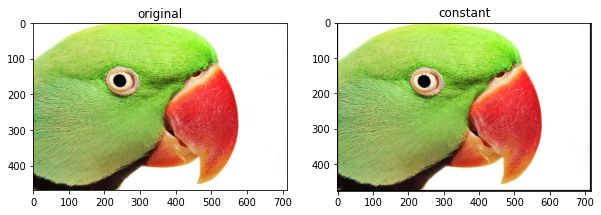

original shape: (470, 712, 3)
padding shape: (476, 718, 3)


In [ ]:
# define a function that could return a image matrix with zero-padding based on the input "img" and "p_size".

def padding_img(img,p_size,style='constant'):
  # -------------- To do ----------------- #
  row=np.zeros((p_size,img.shape[1],3))
  img=np.row_stack((img,row))
  img=np.row_stack((row,img))
  col=np.zeros((img.shape[0],p_size,3))
  img=np.column_stack((img,col))
  img=np.column_stack((col,img))
  return img

# you should plot the original image, the padding image and their shape.
# -------------- To do ----------------- #
image = cv2.imread('image/bird.jpg')
image = image[:,:,::-1]
padding = padding_img(image, 3)
padding=padding.astype(np.uint8)
fig = plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(image)
plt.subplot(1,2,2)
plt.title('constant')
plt.imshow(padding)
plt.show()

print(f"original shape: {image.shape}")
print(f"padding shape: {padding.shape}")

## Step 3 : Convolution


[The difference between convolution and cross-correlation from a signal-analysis point of view](https://dsp.stackexchange.com/questions/27451/the-difference-between-convolution-and-cross-correlation-from-a-signal-analysis)

[Border type](https://docs.opencv.org/master/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5)

![](https://i.imgur.com/qEYv2fV.png)
![](https://i.imgur.com/SGeFKLD.png)

In [ ]:
# define a function that does the convlution operation with the input image matrix and input kernel matrix.

def Convolution(image, Kernel):
  row, col, depth = image.shape
  resx=np.zeros((row,col,3)) #initial a result image
  padimg = padding_img(image,(KernelSize-1)//2)

  # -------------- To do ----------------- #
  for i in range(resx.shape[0]):
    for j in range(resx.shape[1]):
      for u in range(0,KernelSize):
        for v in range(0,KernelSize):
          resx[i][j] += Kernel[u][v] * padimg[i+u][j+v]

  return resx

resx = Convolution(image, Gaussian_Kernel) # we get a result matrix here.
print('Convolution Finished!')

Convolution Finished!


## Step 4 : Result

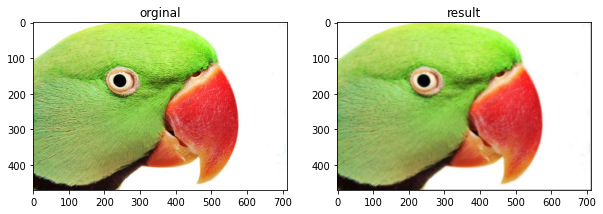

original shape: (470, 712, 3)
result shape: (470, 712, 3)


In [ ]:
# you should plot both the original image and the image after having convlution with the kernel.
# you should print their shape.
 
# -------------- To do ----------------- #
fig = plt.figure(figsize=(10,20))
plt.subplot(1,2,1)
plt.title('orginal')
plt.imshow(image)
plt.subplot(1,2,2)
plt.title('result')
plt.imshow(resx.astype(np.uint8))
plt.show()
print("original shape:", image.shape)
print("result shape:", resx.shape)

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'original')

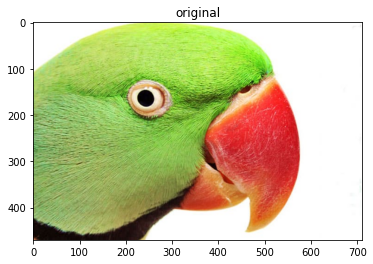

In [ ]:
image = cv2.imread("image/bird.jpg")
image = image[:,:,::-1]

plt.imshow(image)
plt.title('original')

## 以下四個 Filter 選擇一項來完成

### Sharpening Filter

kernel:
 [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]


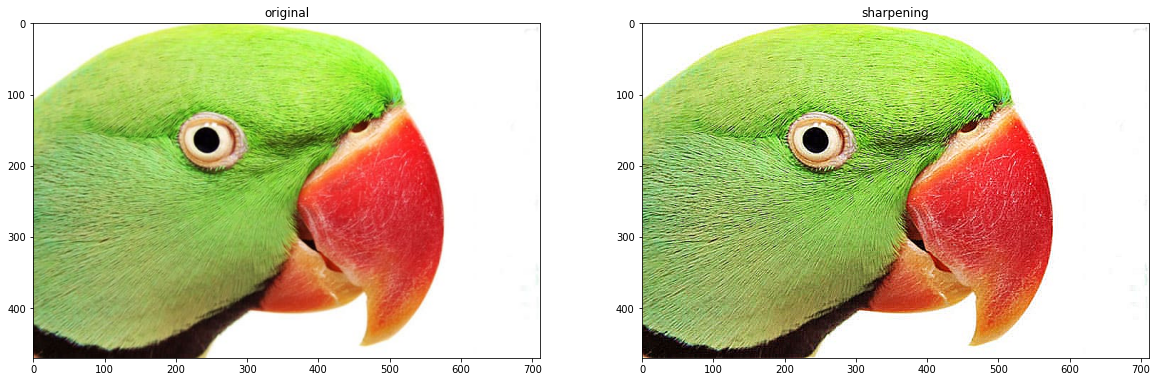

original shape: (470, 712, 3)
sharpening shape: (470, 712, 3)


In [ ]:
# you could use the conv function in your previous work.
# use [0 -1 0] to sharp your image
#    [-1 5 -1]
#    [0 -1 0]
KernelSize = 3

def Sharpening(image, KernelSize):
  # -------------- To do ----------------- #
  kernel = [[0, -1, 0], [-1, 5, -1], [0, -1, 0]]
  print("kernel:\n",kernel)
  sharpening = Convolution(image.astype(int), kernel)
  sharpening = np.clip(sharpening, 0, 255).astype(np.uint8)
  return sharpening

# plot the image and shape
# -------------- To do ----------------- #
sharpening = Sharpening(image, KernelSize)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("sharpening")
plt.imshow(sharpening)
plt.show()
print("original shape:", image.shape)
print("sharpening shape:", sharpening.shape)

### Mean Filter

Kernel:
 [[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]


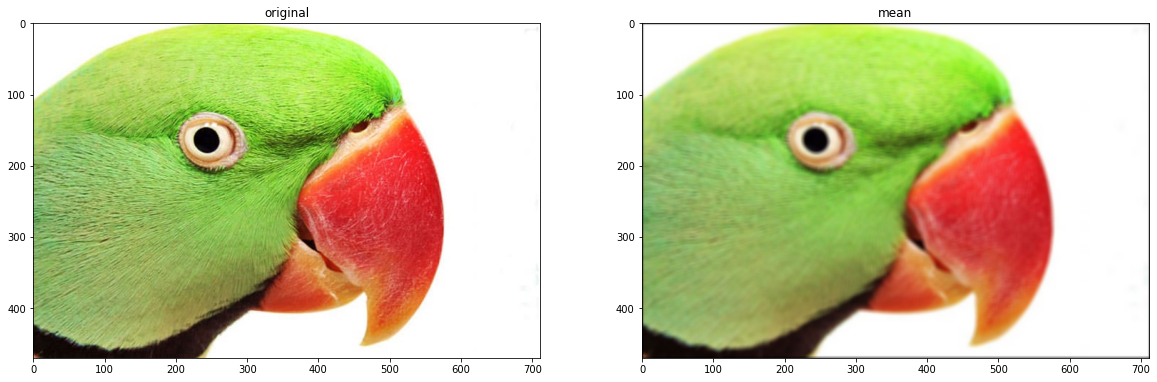

original shape: (470, 712, 3)
mean shape: (470, 712, 3)


In [ ]:
# you could use the conv function in your previous work.
KernelSize = 7

def Mean(image, KernelSize):
  # -------------- To do ----------------- #
  Kernel = np.zeros((KernelSize,KernelSize))
  Kernel += 1/(KernelSize**2)
  print("Kernel:\n", Kernel)
  mean_ = Convolution(image.astype(int),Kernel)
  mean_ = mean_.astype(np.uint8)
  return mean_
  return mean_

# plot the image and shape
# -------------- To do ----------------- #
mean = Mean(image,KernelSize)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("mean")
plt.imshow(mean)
plt.show()
print("original shape:", image.shape)
print("mean shape:", mean.shape)

### Shift Filter

Kernel:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


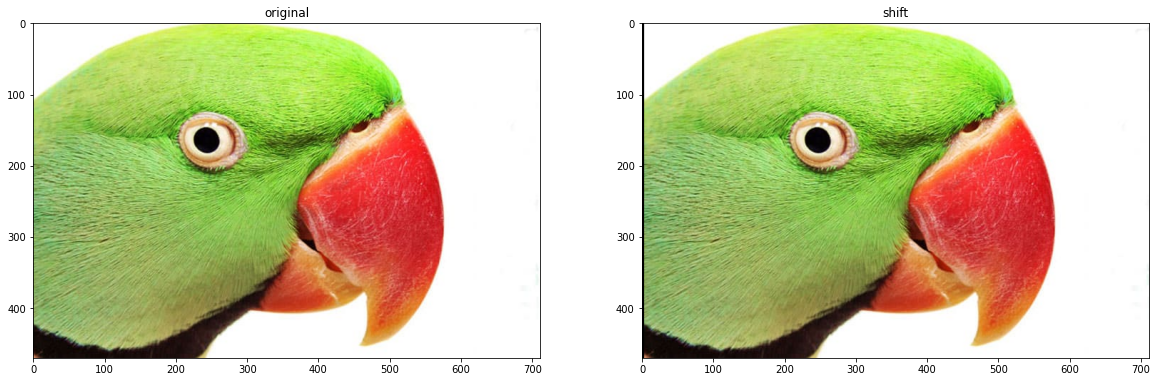

original shape: (470, 712, 3)
shift shape: (470, 712, 3)


In [ ]:
# you could use the function in your previous work.
KernelSize = 7

def Shift(image, KernelSize):
  # -------------- To do ----------------- #
  Kernel = np.zeros((KernelSize,KernelSize))
  Kernel[KernelSize // 2,0] = 1
  print("Kernel:\n", Kernel)
  shift_ = Convolution(image.astype(int),Kernel)
  shift_ = shift_.astype(np.uint8)
  return shift_

  return shift_

# plot the image and shape
# -------------- To do ----------------- #
shift = Shift(image,KernelSize)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("shift")
plt.imshow(shift)
plt.show()
print("original shape:", image.shape)
print("shift shape:", shift.shape)

### Thresholding Filter

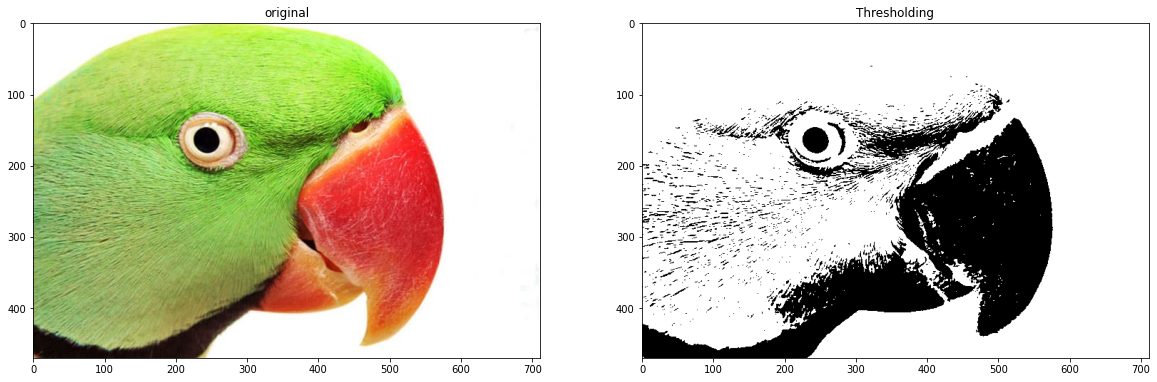

original shape: (470, 712, 3)
Thresholding shape: (470, 712)


In [ ]:
def Thresholding(img, threshold = 125):
  # -------------- To do ----------------- #
  img_ = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  for rows in img_:
    for i in range(len(rows)):
      if rows[i]>threshold:
        rows[i] = 255
      else:
        rows[i] = 0 
  return img_
    
# plot the image and shape
# -------------- To do ----------------- #
thresholding = Thresholding(image)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("original")
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("Thresholding")
plt.imshow(thresholding,cmap="gray")
plt.show()
print("original shape:", image.shape)
print("Thresholding shape:", thresholding.shape)